# Problem definition
<br>
<h4>Here's a general description of the dataset columns:<h4><br>
<p>
    
* **`Store:`** A unique identifier for each Rossmann store.

* **`DayOfWeek:`** The day of the week (1 = Monday, 2 = Tuesday, etc.).

* **`Date:`** The date of the sales data.

* **`Sales:`** The actual sales on a given day for a particular store. This is the target variable for **predictive modeling tasks**.

* **`**`Customers:`** The number of customers who made purchases on a given day at a particular store.

* **`Open:`** A binary indicator (0 or 1) that represents whether the store was open on a given day.

* **`Promo:`** A binary indicator (0 or 1) that represents whether the store had a promotion on a given day.

* **`StateHoliday:`** Indicates whether it's a state holiday (a, b, c) or not (0, "0" = no holiday, "a" = public holiday, "b" = Easter holiday, "c" = Christmas).

* **`SchoolHoliday:`** A binary indicator (0 or 1) that represents whether there was a school holiday on a given day.

* **`StoreType:`** The type of store (a, b, c, d) which provides information about the store format.

* **`Assortment:`** The assortment level (a, b, c) which describes the product range available in the store.

* **`CompetitionDistance:`** The distance to the nearest competitor store.

* **`CompetitionOpenSinceMonth:`** The month when the nearest competitor store opened.

* **`CompetitionOpenSinceYear:`** The year when the nearest competitor store opened.

* **`Promo2:`** A binary indicator (0 or 1) that represents whether the store is participating in a continuous promotion (Promo2).

* **`Promo2SinceWeek:`** The calendar week when Promo2 started.

* **`Promo2SinceYear:`** The year when Promo2 started.

* **`PromoInterval:`** Describes the consecutive intervals Promo2 is started, naming the months the promotion is active.
<p>
<br>

# Loading Main Libraries

In [399]:
#load the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('ggplot')
import plotly.express as px

# Data Loading

In [400]:
# Load the data
store_df = pd.read_csv('store.csv')
train_df = pd.read_csv('train.csv')
print('In the Store set a.k.a store_df has '+str(store_df.shape[0])+ ' rows/observation and '+str(store_df.shape[1])+ ' coloumns')
print('In the Train set a.k.a train_df has '+str(train_df.shape[0])+ ' rows/observation and '+str(train_df.shape[1])+ ' coloumns')

In the Store set a.k.a store_df has 1115 rows/observation and 10 coloumns
In the Train set a.k.a train_df has 1017209 rows/observation and 9 coloumns


C:\Users\retee\AppData\Local\Temp\ipykernel_6980\3719294753.py:3: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



# Data Processing

In [401]:
display(train_df.isnull().all(),train_df.shape,train_df.head().append(train_df.tail()))
display(store_df.isnull().all(),store_df.head().append(store_df.tail()))

C:\Users\retee\AppData\Local\Temp\ipykernel_6980\2736820135.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

(1017209, 9)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


C:\Users\retee\AppData\Local\Temp\ipykernel_6980\2736820135.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
dtype: bool

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [402]:
opened_sales = (train_df[(train_df.Open == 1) & (train_df.Sales)]) #if the stores are opend
opened_sales.Sales.describe()

count    422307.000000
mean       6951.782199
std        3101.768685
min         133.000000
25%        4853.000000
50%        6367.000000
75%        8355.000000
max       41551.000000
Name: Sales, dtype: float64

D:\SOftwares\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\SOftwares\ANACONDA\lib\site-packages\seaborn\distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



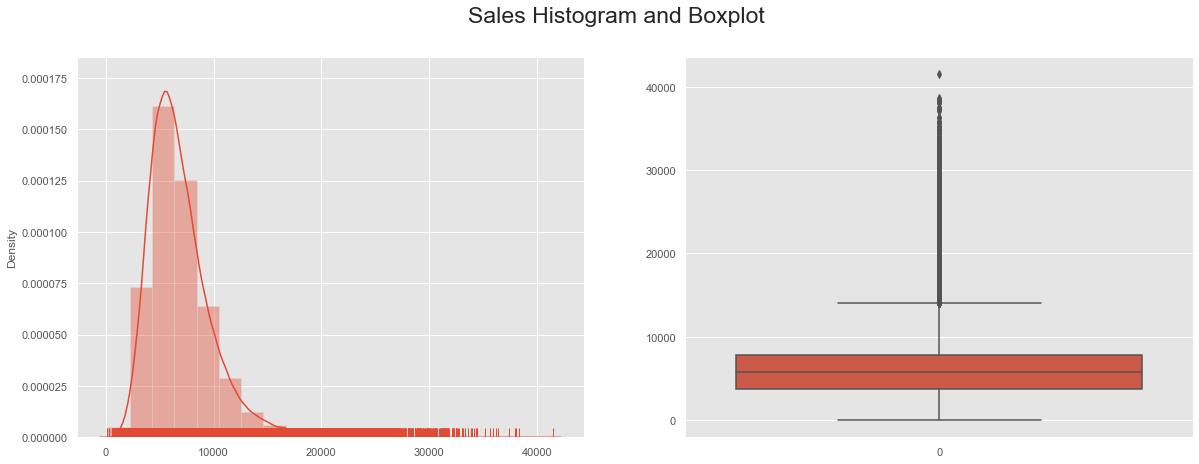

In [403]:
fig,ax = plt.subplots(1,2,figsize = (20, 7))
plt.suptitle('Sales Histogram and Boxplot',fontsize =23)
fig = sns.distplot(opened_sales, x=opened_sales.Sales,bins=20,kde= True,rug =True,ax=ax[0])
fig = sns.boxplot(data = train_df.Sales,ax=ax[1])
plt.show()

D:\SOftwares\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\SOftwares\ANACONDA\lib\site-packages\seaborn\distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



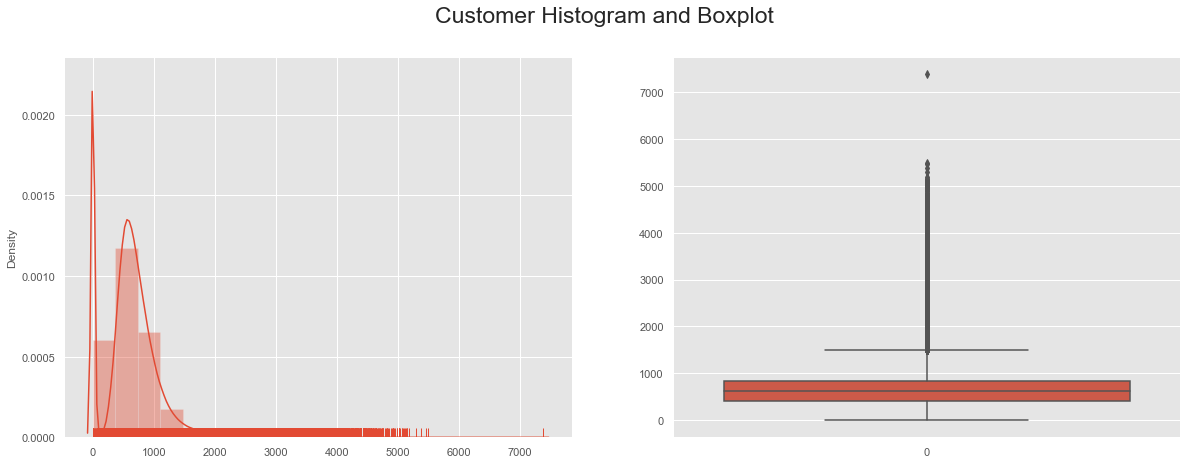

In [404]:
fig,ax = plt.subplots(1,2,figsize = (20, 7))
plt.suptitle('Customer Histogram and Boxplot',fontsize =23)
fig = sns.distplot(train_df, x=train_df.Customers,bins=20,kde= True,rug =True,ax=ax[0])
fig = sns.boxplot(data = train_df.Customers,ax=ax[1])
plt.show()

# Data Cleaning

<br>

### 1) Removing Duplicate values

In [405]:
train_df= train_df.drop_duplicates()
store_df= store_df.drop_duplicates()
# droping those observations which have 0 sales made in that day
train_df = train_df[train_df.Sales!=0]

<br>

### 2) Outlier Cleaning

In [406]:
def find_low_high(feature):
    # find store specific Q1 - 3*IQ and Q3 + 3*IQ
    IQ = train_df.groupby('Store')[feature].quantile(0.75)-train_df.groupby('Store')[feature].quantile(0.25)
    Q1 = train_df.groupby('Store')[feature].quantile(0.25)
    Q3 = train_df.groupby('Store')[feature].quantile(0.75)
    low = Q1 - 3*IQ
    high = Q3 + 3*IQ
    low = low.to_frame()
    low = low.reset_index()
    low = low.rename(columns={feature: "low"})
    high = high.to_frame()
    high = high.reset_index()
    high = high.rename(columns={feature: "high"})
    return {'low':low, 'high':high}

def find_outlier_index(feature):
    main_data = train_df[['Store',feature]]
    low = find_low_high(feature)["low"]
    high = find_low_high(feature)["high"]
    
    new_low = pd.merge(main_data, low, on='Store', how='left')
    new_low['outlier_low'] = (new_low[feature] < new_low['low'])
    index_low = new_low[new_low['outlier_low'] == True].index
    index_low = list(index_low)
    
    new_high = pd.merge(main_data, high, on='Store', how='left')
    new_high['outlier_high'] = new_high[feature] > new_high['high']
    index_high = new_high[new_high['outlier_high'] == True].index
    index_high = list(index_high)
    
    index_low.extend(index_high)
    index = list(set(index_low))
    return index

In [407]:
# decide to delete the 1113 observations above to delete the sales outlier
train_df=train_df.reset_index()
train_df.drop(find_outlier_index("Sales"), inplace=True, axis=0)
display(train_df.shape,train_df.head(10))

(843225, 10)

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,5,2015-07-31,5263,555,1,1,0,1
1,1,2,5,2015-07-31,6064,625,1,1,0,1
2,2,3,5,2015-07-31,8314,821,1,1,0,1
3,3,4,5,2015-07-31,13995,1498,1,1,0,1
4,4,5,5,2015-07-31,4822,559,1,1,0,1
5,5,6,5,2015-07-31,5651,589,1,1,0,1
6,6,7,5,2015-07-31,15344,1414,1,1,0,1
7,7,8,5,2015-07-31,8492,833,1,1,0,1
8,8,9,5,2015-07-31,8565,687,1,1,0,1
9,9,10,5,2015-07-31,7185,681,1,1,0,1


<br>

### 3) Missing Values

As we clearly saw that there was no missing values in train_df. However, we found out some NaN values in store_df.

In [408]:
# Missing data we have in %:
100 - (store_df.count() / store_df.shape[0]*100)

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

#####  **Competition Feature** and **Promo Feature**

In [409]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [410]:
#  Its better to choose between mean and median to fill the NaNs
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median(), inplace = True)
#The missing values, are not there, because the stores had no competition. So I would suggest to fill the missing values with zeros.
store_df["CompetitionOpenSinceMonth"].fillna(0, inplace = True)
store_df["CompetitionOpenSinceYear"].fillna(0, inplace = True)

# so if no promo has been made, then we should replace the NaN from Promo since Week and Year with zero
store_df["Promo2SinceWeek"].fillna(0, inplace = True)
store_df["Promo2SinceYear"].fillna(0, inplace = True)
store_df["PromoInterval"].fillna(0, inplace = True)

store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 95.8+ KB


<br>

### 3) Category Analysis

In [411]:
# We will be reverting this changes back to 0 and 1,for future numerical analysis
train_df.StateHoliday =  train_df["StateHoliday"].map({0:0, "0": 0, "a": 'Public Holiday', "b": 'Easter holiday', "c": 'Christmas'})
train_df.StateHoliday.unique()

array([0, 'Public Holiday', 'Easter holiday', 'Christmas'], dtype=object)

<br>

### 4) Grouping store on basis of store level

In [412]:
def get_store_sales_statistics(df, df2):
    mean = df.groupby('Store')['Sales'].mean()
    std = df.groupby('Store')['Sales'].std()
    mean_dataframe = pd.DataFrame(mean).reset_index()
    std_dataframe = pd.DataFrame(std).reset_index()
    df2 = pd.merge(df2,mean_dataframe, on='Store', how='left').rename(columns={"Sales": "SalesMean"})
    df2 = pd.merge(df2,std_dataframe, on='Store', how='left').rename(columns={"Sales": "SalesStd"})
    return df2
def get_sales_level_groups(df2):
    Q1 = df2.SalesMean.quantile(0.25)
    Q2 = df2.SalesMean.quantile(0.50)
    Q3 = df2.SalesMean.quantile(0.75)
    df2['StoreGroup1'] = (df2.SalesMean < Q1).astype(int)
    df2['StoreGroup2'] = ((df2.SalesMean>=Q1) & (df2.SalesMean<Q2)).astype(int)
    df2['StoreGroup3'] = ((df2.SalesMean>=Q2) & (df2.SalesMean<Q3)).astype(int)
    df2['StoreGroup4'] = (df2.SalesMean>=Q3).astype(int)
    
    #only one is True and rest will be False
    df2['StoreGroup']= df2['StoreGroup1'] + 2*df2['StoreGroup2'] + 3*df2['StoreGroup3'] + 4*df2['StoreGroup4']
    df2.drop(['StoreGroup1','StoreGroup2','StoreGroup3','StoreGroup4'],axis=1, inplace=True)
    return df2
store_df = get_store_sales_statistics(train_df, store_df)
store_df = get_sales_level_groups(store_df)


<br>

### 5) Date Feature

In [413]:
def featured_date(df):
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df['Date'] = df['Date'].astype("datetime64[ns]")
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year 
    return(df)

train_df = featured_date(train_df)

<br>

### 6) Dataframe Merging

In [414]:
train_store_df = pd.merge(train_df, store_df, how = "left", on = "Store")
train_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843225 entries, 0 to 843224
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   index                      843225 non-null  int64         
 1   Store                      843225 non-null  int64         
 2   DayOfWeek                  843225 non-null  int64         
 3   Date                       843225 non-null  datetime64[ns]
 4   Sales                      843225 non-null  int64         
 5   Customers                  843225 non-null  int64         
 6   Open                       843225 non-null  int64         
 7   Promo                      843225 non-null  int64         
 8   StateHoliday               843225 non-null  object        
 9   SchoolHoliday              843225 non-null  int64         
 10  Day                        843225 non-null  int64         
 11  Month                      843225 non-null  int64   

# Data Analysis

### 1). Coorelation Analysis

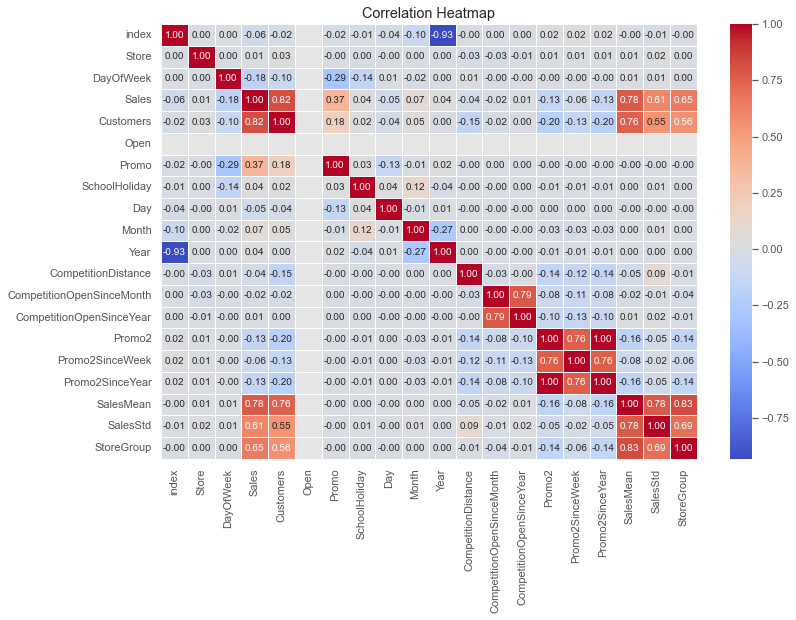

In [415]:
correlation_matrix = train_store_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


* Strong positive correlation between 'Sales' and 'Customers,' indicating sales increase with more customers.
* Moderate positive correlation between 'Sales' and 'Promo,' suggesting promotions boost sales.
Weak negative correlation between 'Sales' and 'CompetitionDistance,' implying closer competitors may lead to lower sales.
* 'DayOfWeek,' 'Month,' and 'Year' have weak correlations with 'Sales,' suggesting sales independence from these factors.
* 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' show weak negative correlations with 'Sales,' suggesting longer competitor presence may slightly reduce sales.

**`Note:`** Correlation does not imply causation, and further analysis is needed to uncover deeper insights and causal relationships.

### 2). Sale Analysis

#### 2.1) Total Sales Made Over in Three Years

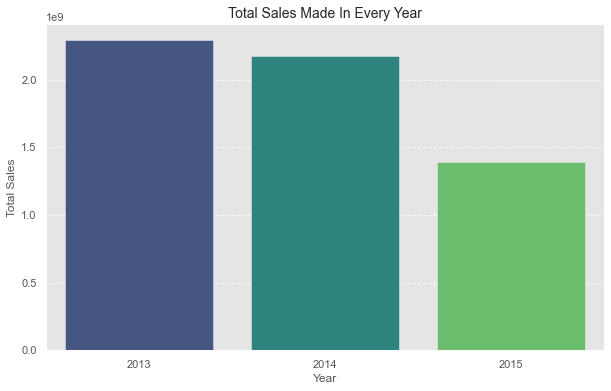

In [416]:
plt.figure(figsize=(10, 6))
sns.barplot(data=year_sales, x='Year', y='Sales',  palette="viridis")
plt.title('Total Sales Made In Every Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()

In the analysis of total sales made in each year, it is clear that sales performance remained consistent over the three years under consideration (note: that we only have data for the first six months of year 2015, which means that total sales for year 2015 are only half of previous years, so we are assuming that total sales for year 2015 are similar to year 2014 and 2015). The bar plot demonstrates that overall sales were comparable in each year (2013, 2014, and 2015), with no major changes. This indicates that the company's sales performance was constant over this time period.

#### 2.2) Total Monthly Sales Made Over The Years

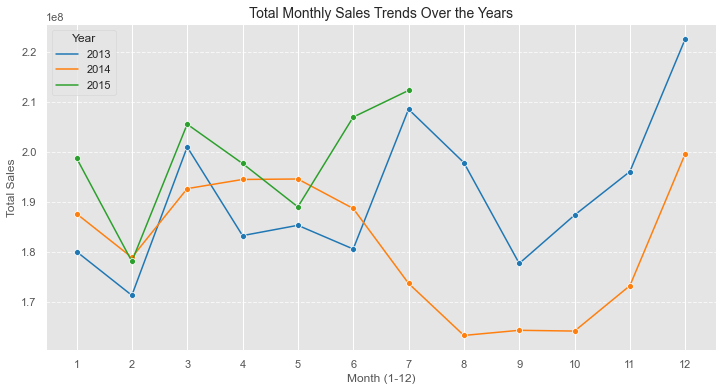

In [417]:
# Define a custom color palette for the lines (e.g., blue and red)
custom_palette = sns.color_palette("tab10", n_colors=len(year_month_sale['Year'].unique()))

year_month_sale = train_store_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Create a line plot with custom line colors
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_month_sale, x='Month', y='Sales', hue='Year', marker='o', palette=custom_palette)

# Customize the plot
plt.title('Total Monthly Sales Trends Over the Years', fontsize=14)
plt.xlabel('Month (1-12)', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(range(1, 13))  # Ensure x-axis displays all months (1-12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.legend(title='Year')

plt.show()


The line plot illustrates total monthly sales trends over three years (2013, 2014, 2015). It shows consistent sales growth from January to July each year, with a significant sales spike in December during the holiday season. These patterns suggest strong seasonality and holiday-related sales peaks.

#### 2.3) Total Sales Made in Every Week of Month

<Figure size 1152x576 with 0 Axes>

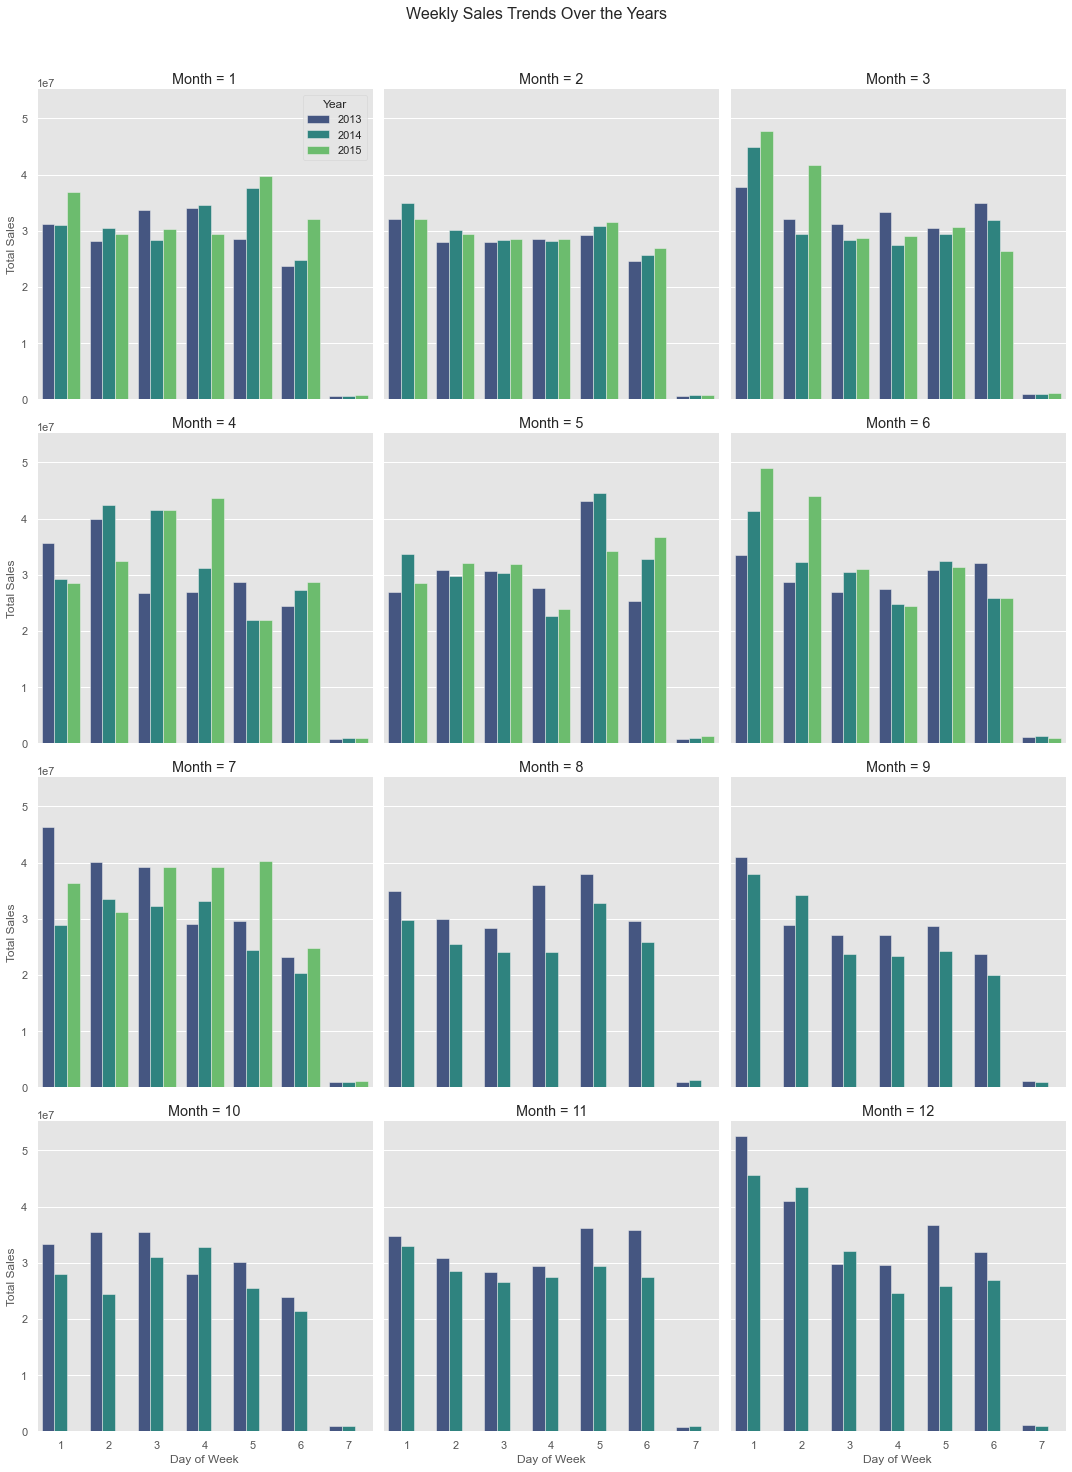

In [418]:
week_month_sales = train_store_df.groupby(['DayOfWeek', 'Month', 'Year'])['Sales'].sum().reset_index()
plt.figure(figsize=(16, 8))
#sns.set_style("whitegrid")
fig = sns.catplot(
    data=week_month_sales, kind="bar",
    x="DayOfWeek", y="Sales", hue="Year",
    col="Month", col_wrap=3,
    palette="viridis", legend_out=False
)
fig.set_axis_labels("Day of Week", "Total Sales")
fig.fig.suptitle("Weekly Sales Trends Over the Years", y=1.02, fontsize=16)

for ax in fig.axes.flat:
    ax.set_title(f"{ax.get_title()}")

plt.tight_layout() #function ensures that the facets are properly arranged and spaced.
plt.show()

* Sales tend to be relatively consistent across the days of the week.
* There is a noticeable weekly sales pattern, with peaks typically occurring around mid-week.
* Each subplot shows how this pattern repeats throughout the year, with variations across different months.

#### 2.4) Total Sales Made in Holiday's Over Years

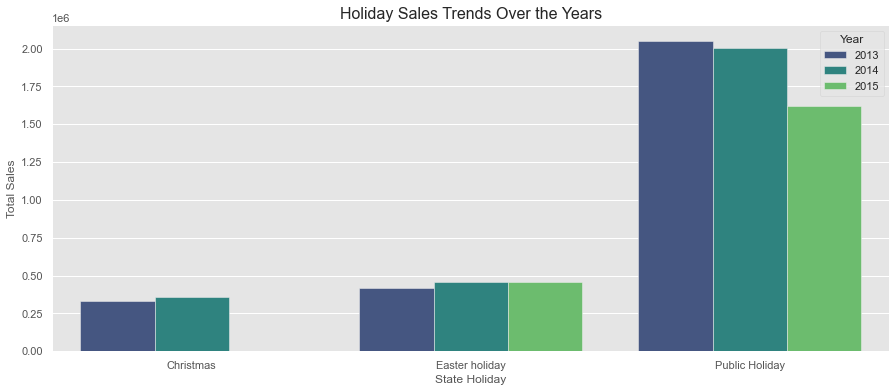

In [419]:
holiday_sales = train_store_df[train_store_df['StateHoliday'] != 0].groupby(['StateHoliday', 'Year'])['Sales'].sum().reset_index()

plt.figure(figsize=(15, 6))
#sns.set_style("whitegrid")
sns.barplot(data=holiday_sales, x='StateHoliday', y='Sales', hue='Year', palette="viridis")
plt.title('Holiday Sales Trends Over the Years', fontsize=16)
plt.xlabel('State Holiday', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Year')
plt.show()

* Sales during state holidays are notably higher in 2013 compared to the other years.
* There is a significant increase in sales during state holidays in 2013 and 2014, with a noticeable decline in 2015.
* This analysis helps in understanding how state holidays impact sales performance, with potential implications for marketing and promotional strategies during these periods.

#### 2.5) Average Sales Made For Each Day Over The Years

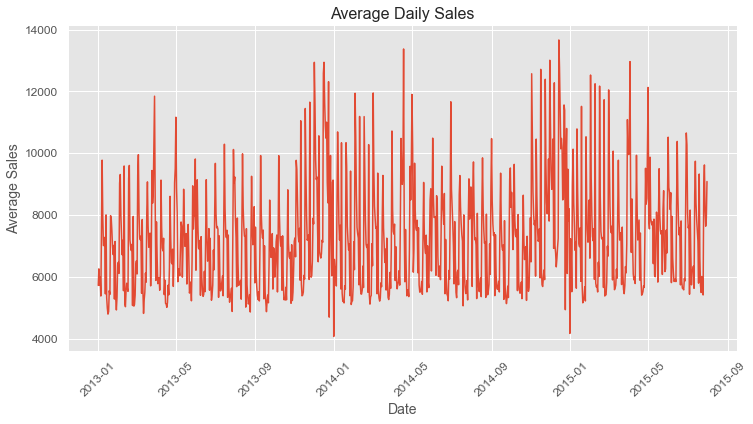

In [420]:
train_store_df['Date'] = pd.to_datetime(train_store_df['Date'])

# Calculate average daily sales
average_daily_sales = train_store_df.groupby('Date')['Sales'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Date', y='Sales', data=average_daily_sales, palette="viridis")
plt.title('Average Daily Sales', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

* Sales exhibit fluctuations throughout the observed period.
* There are periodic spikes in average daily sales, suggesting potential seasonality or periodic promotions.
* This analysis helps in understanding the overall trend in daily sales and identifying potential opportunities for sales optimization.

#### 2.6) Average Sales Made For Each Day Of The Week 

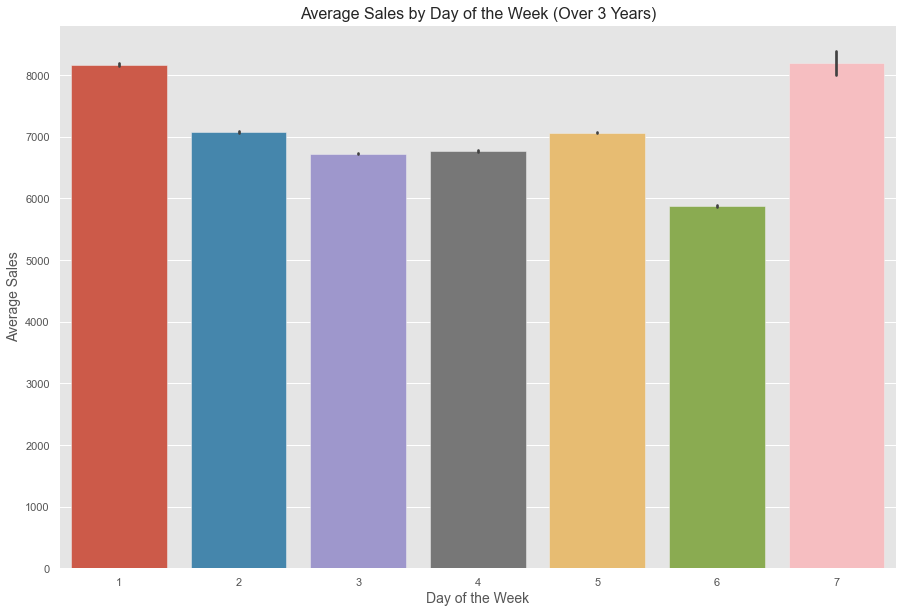

In [421]:
plt.figure(figsize=(15, 10))
sns.barplot(x="DayOfWeek", y="Sales", data=train_store_df)
plt.title("Sales by Day of the Week", fontsize=16)
plt.title("Average Sales by Day of the Week (Over 3 Years)", fontsize=16)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Average Sales", fontsize=14)
plt.show()

* Sales tend to decrease somewhat over the week, but increase on Sunday.
* There is no significant variation in average sales from one day to another.


### 3). Store Analysis

#### 3.1) Opened Store Distribution during Holiday and Regular Working Day

In [422]:
holiday_counts = train_store_df['StateHoliday'].value_counts().reset_index()
holiday_counts.columns = ['StateHoliday', 'Store Count']
fig = px.pie(holiday_counts, names='StateHoliday', values='Store Count', title='Stores Opened on Different Holiday Types')
fig.show()

* The majority of stores are open on regular non-state holidays (StateHoliday=0).
* A smaller proportion of stores are open on public holidays (StateHoliday=1).
* Fewer stores are open on Easter (StateHoliday=2) and Christmas (StateHoliday=3).
* This analysis helps in understanding the distribution of store openings across various holiday types.

#### 3.2) Total Stores of different Store Types

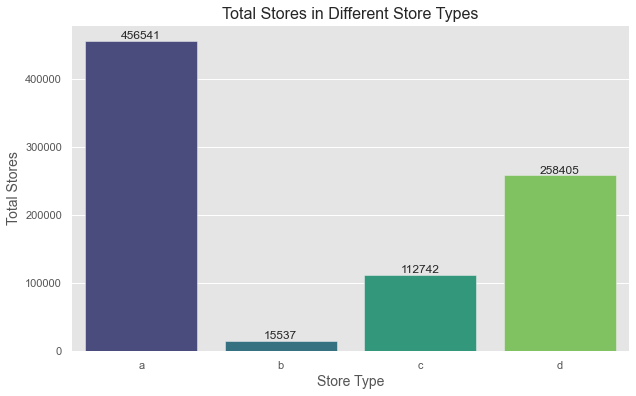

In [423]:
store_type = train_store_df.groupby('StoreType')['Store'].count().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='StoreType', y='Store', data=store_type, palette="viridis")
plt.title('Total Stores in Different Store Types', fontsize=16)
plt.xlabel('Store Type', fontsize=14)
plt.ylabel('Total Stores', fontsize=14)
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                fontsize=12)
plt.show()

* Store type 'A' has the highest number of stores.
* Store type 'D' also has a substantial number of stores.
* Store types 'B' and 'C' have fewer stores in comparison.
* This analysis provides a clear picture of the store distribution among different types, which can inform decisions related to inventory management, marketing, and resource allocation

#### 3.3) Total Sales by Store Type

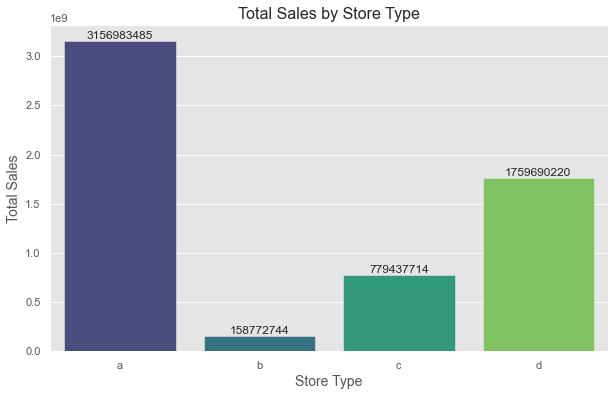

In [424]:
store_sale = train_store_df.groupby('StoreType')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='StoreType', y='Sales', data=store_sale, palette="viridis")
plt.title('Total Sales by Store Type', fontsize=16)
plt.xlabel('Store Type', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                fontsize=12)
plt.show()

* Store type 'A' contributes the highest total sales.
* Store types 'D' and 'C' also make significant sales contributions.
* Store type 'B' has lower total sales in comparison.
* This analysis provides valuable insights into the sales performance of different store types, which can guide strategies for each store category.

#### 3.4) Average Sales by Store Type

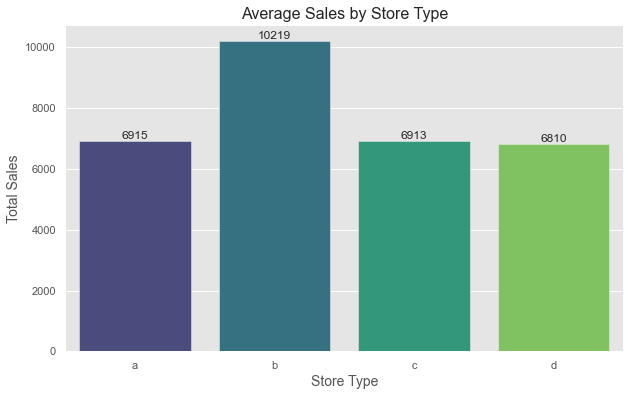

In [425]:
store_sale = train_store_df.groupby('StoreType')['Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='StoreType', y='Sales', data=store_sale, palette="viridis")
plt.title('Average Sales by Store Type', fontsize=16)
plt.xlabel('Store Type', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                fontsize=12)
plt.show()

* Store type 'B' has the highest average sales, indicating it is the most profitable store type on average.
* Store type 'A' and 'C' also have respectable average sales.
* Store type 'D' has the lowest average sales among the categories.
* This analysis helps in understanding the variations in sales performance across different store types, which can be valuable for strategic decision-making.

#### 3.5) Total Sale Made by different store type during Promotion period

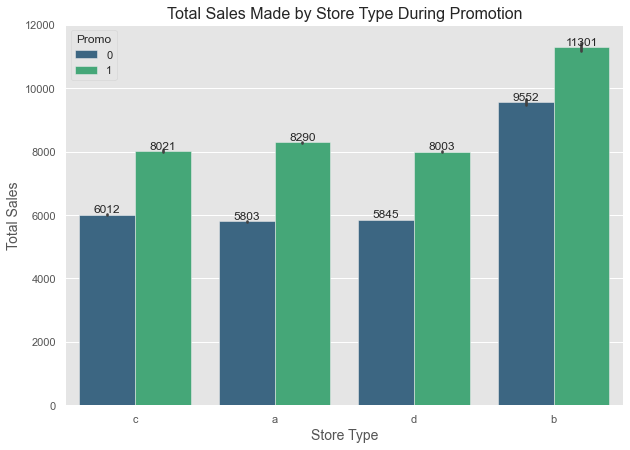

In [427]:
plt.figure(figsize=(10, 7))
ax = sns.barplot(data=train_store_df, x='StoreType', y='Sales', hue='Promo',palette="viridis")
plt.title('Total Sales Made by Store Type During Promotion', fontsize=16)
plt.xlabel('Store Type', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                fontsize=12)
plt.show()

* Store type 'B' has the highest total sales during promotions, indicating it performs well during promotional events.
* Store types 'A' and 'C' also exhibit notable total sales during promotions.
* Store type 'D' has comparatively lower sales during promotions.
* This analysis helps in understanding how different store types respond to promotional activities, providing insights for optimizing marketing strategies.

#### 3.6) Total Sale Made by different store type during Assortment


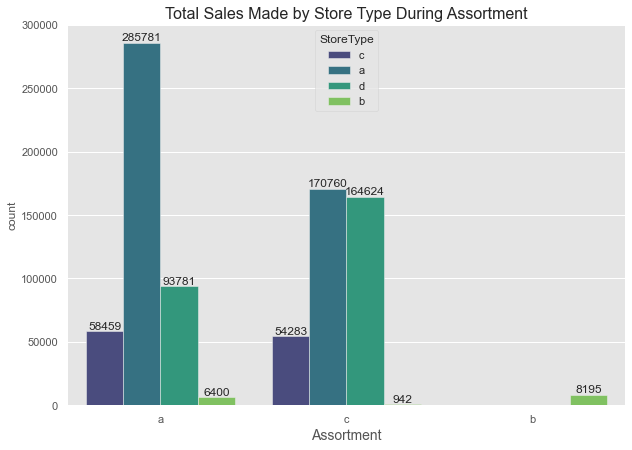

In [428]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=train_store_df, x='Assortment', hue='StoreType',palette="viridis")
plt.title('Total Sales Made by Store Type During Assortment', fontsize=16)
plt.xlabel('Assortment', fontsize=14)
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                fontsize=12)
plt.show()

* Store type 'A' is associated with Assortment level 'a' and 'c.'
* Store types 'B' and 'C' primarily align with Assortment level 'a.'
* Store type 'D' is related to Assortment level 'c.'
* This analysis provides insights into the assortment strategies adopted by different store types, aiding in understanding how they cater to various customer preferences and needs.

#### 3.7) Total Sale Made By Store during Holidays


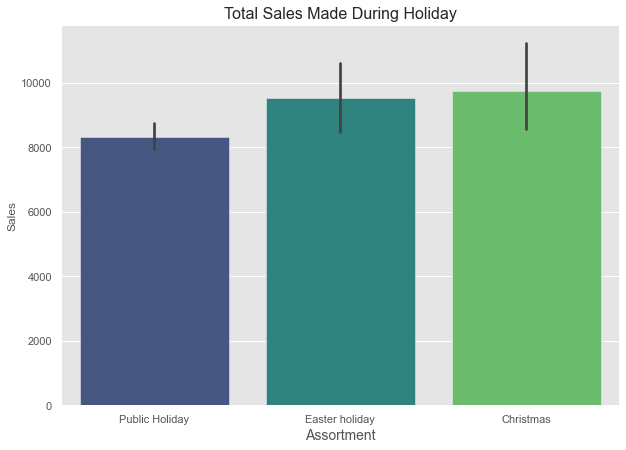

In [429]:
holiday_sales = train_store_df[train_store_df['StateHoliday'] !=0]
plt.figure(figsize=(10, 7))
ax = sns.barplot(data=holiday_sales, x='StateHoliday',y='Sales',palette="viridis")
plt.title('Total Sales Made During Holiday', fontsize=16)
plt.xlabel('Assortment', fontsize=14)
plt.show()

* Sales during state holidays are significantly higher compared to non-holiday periods.
* State holidays have a noticeable positive impact on sales.
* This analysis provides insights into the sales performance during holidays, which can be valuable for planning marketing and promotional activities around these special occasions.

#### 3.8) Store Group 

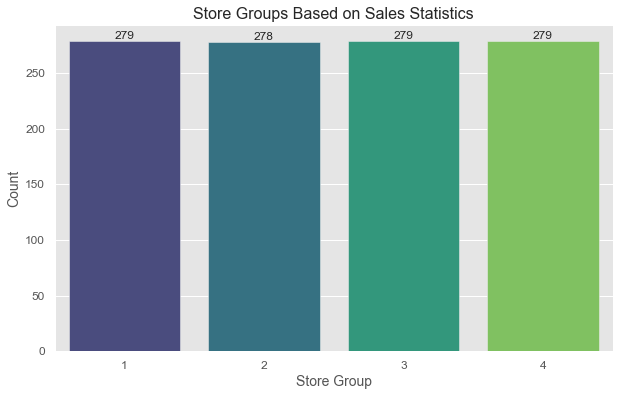

In [430]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=store_df, x='StoreGroup', palette='viridis')
plt.title('Store Groups Based on Sales Statistics', fontsize=16)
plt.xlabel('Store Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                fontsize=12)
plt.show()

### 4). Customer Analysis

#### 4.1) Total Customers

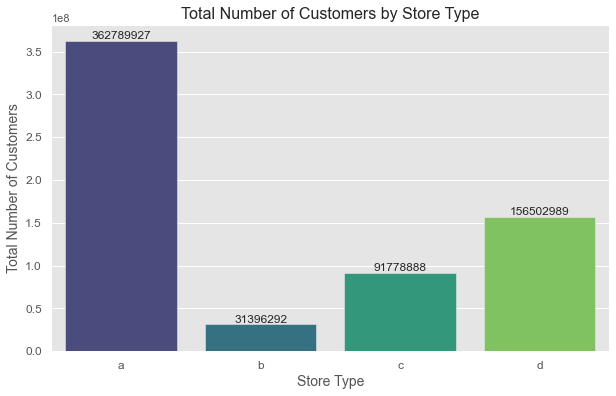

In [431]:
store_type_customers = train_store_df.groupby("StoreType")["Customers"].sum().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="StoreType", y="Customers", data=store_type_customers, palette="viridis")
plt.title('Total Number of Customers by Store Type', fontsize=16)
plt.xlabel('Store Type', fontsize=14)
plt.ylabel('Total Number of Customers', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                fontsize=12)

plt.show()


* Store type 'A' has the highest total number of customers, indicating a higher customer footfall.
* Store types 'D' and 'C' also have significant customer numbers.
* Store type 'B' has a comparatively lower total number of customers.
* This analysis helps in understanding the customer traffic at different store types, which can influence staffing and service strategies.

#### 4.2) Average Customers By Store Type

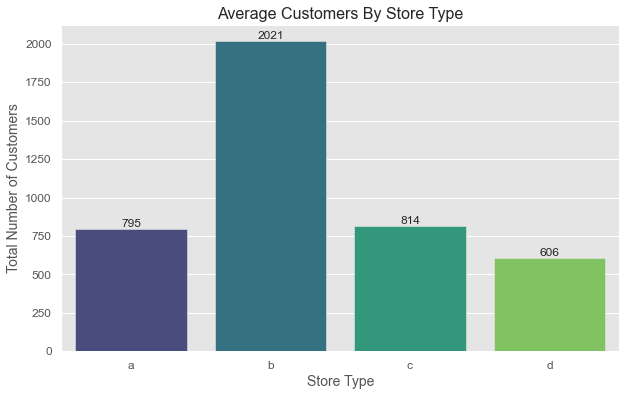

In [432]:
store_type_customers = train_store_df.groupby("StoreType")["Customers"].mean().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="StoreType", y="Customers", data=store_type_customers, palette="viridis")
plt.title('Average Customers By Store Type', fontsize=16)
plt.xlabel('Store Type', fontsize=14)
plt.ylabel('Total Number of Customers', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                fontsize=12)

plt.show()


* Store type 'B' has the highest average number of customers, indicating a higher average customer footfall per store.
* Store types 'A' and 'C' also have notable average customer counts.
* Store type 'D' has the lowest average number of customers among the store types.
* This analysis helps in understanding the average customer traffic at different store types, which can be valuable for optimizing staffing and resource allocation strategies.

#### 4.3) Avergae Customers Spending in Different Store Type

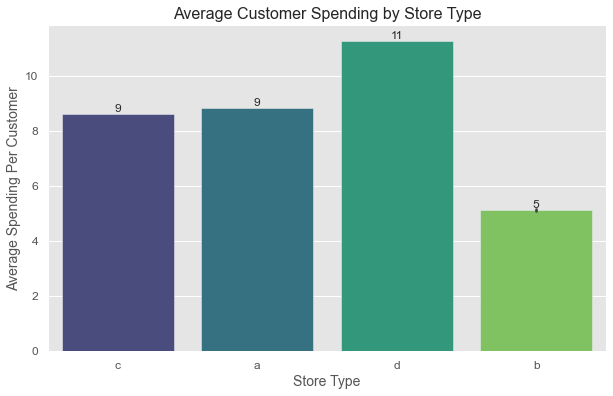

In [433]:
train_store_df["Avg_Customer_Sales"] = train_store_df.Sales / train_store_df.Customers
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="StoreType", y="Avg_Customer_Sales", data=train_store_df, palette="viridis")
plt.title('Average Customer Spending by Store Type', fontsize=16)
plt.xlabel('Store Type', fontsize=14)
plt.ylabel('Average Spending Per Customer', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', 
                fontsize=12)
plt.show()

* Store type 'D' has the highest average spending per customer, indicating that customers at these stores tend to spend more on average.
* Store types 'A' and 'C' also have notable average spending per customer.
* Store type 'B' has the lowest average spending per customer among the store types.
* This analysis helps in understanding the spending behavior of customers at different store types, which can be valuable for marketing and product placement strategies.

#### 4.4) Total Customers Visiting Stores During Holiday

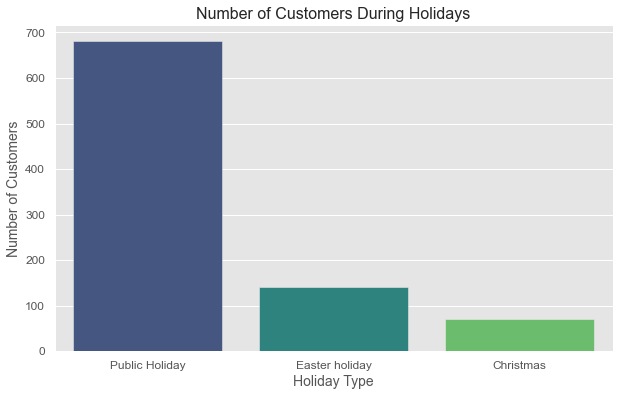

In [434]:
holiday_customers = train_store_df[train_store_df['StateHoliday'] != 0]
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='StateHoliday', data=holiday_customers, palette="viridis")
plt.title('Number of Customers During Holidays', fontsize=16)
plt.xlabel('Holiday Type', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

* There is a notable increase in the number of customers during public holidays (StateHoliday=1).
* During Easter and Christmas holidays (StateHoliday=2 and 3), customer counts are relatively lower.
* This analysis helps in understanding the customer footfall during various holiday types, which can be valuable for planning staffing and promotional activities during these periods.

### 5). Promotion Analysis

#### 5.1) Sale Trend during Promotion Over thge Year

<Figure size 864x576 with 0 Axes>

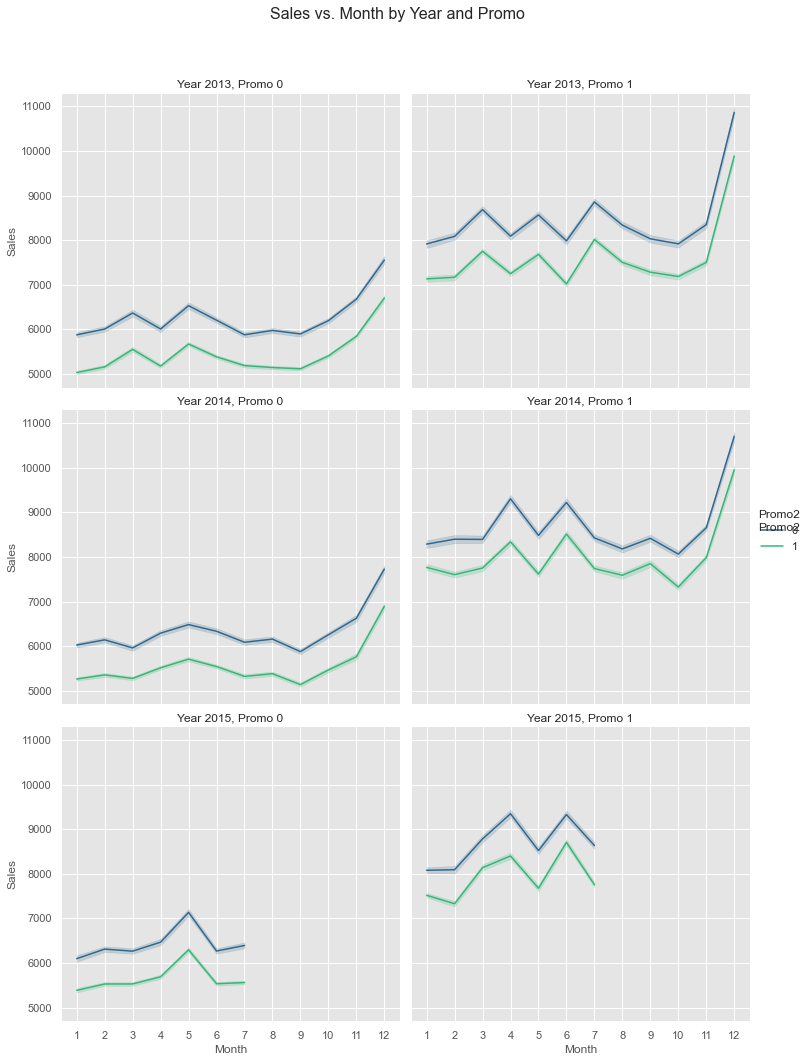

In [435]:
plt.figure(figsize=(12, 8))
ax = sns.relplot(data=train_store_df, x="Month", y="Sales", hue="Promo2", col="Promo", row="Year", kind="line", palette="viridis")
ax.set_axis_labels("Month", "Sales")
ax.set_titles("Year {row_name}, Promo {col_name}")
ax.set(xticks=range(1, 13))
ax.add_legend(title="Promo2")
plt.subplots_adjust(top=0.9)
plt.suptitle("Sales vs. Month by Year and Promo", fontsize=16)
plt.show()


* Sales tend to increase during promotional periods (Promo=1), regardless of the year.
* The impact of Promo2 (ongoing promotion) varies across years, with noticeable sales fluctuations in 2014 and 2015.
* Seasonal trends are consistent, with higher sales during certain months.
* This analysis provides a detailed view of how promotions influence sales across different years and months, helping to tailor marketing strategies.

#### 5.2) Sale By The Day Of The Week With and Without Promotion

<Figure size 720x504 with 0 Axes>

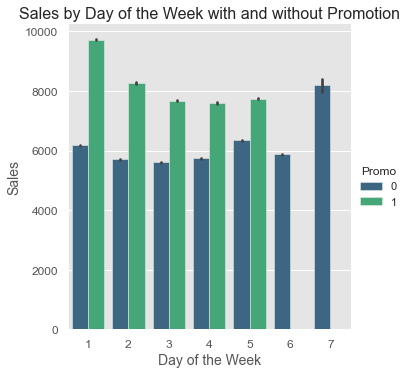

In [436]:
plt.figure(figsize=(10, 7))
sns.catplot(data=train_store_df, x="DayOfWeek", y="Sales", hue="Promo", kind="bar", palette="viridis")
plt.title('Sales by Day of the Week with and without Promotion', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

* Except for Sunday, which is still greater without any promotion, sales are often higher on days with promotions (Promo=1) compared to days without promotions (Promo=0).
* There is a noticeable peak in sales on the first day of the week (DayOfWeek=1) with promotions.
* This analysis helps in understanding the impact of promotions on daily sales and identifying the days when promotions are most effective in boosting sales.

### 6). Promotion Trend During an Year

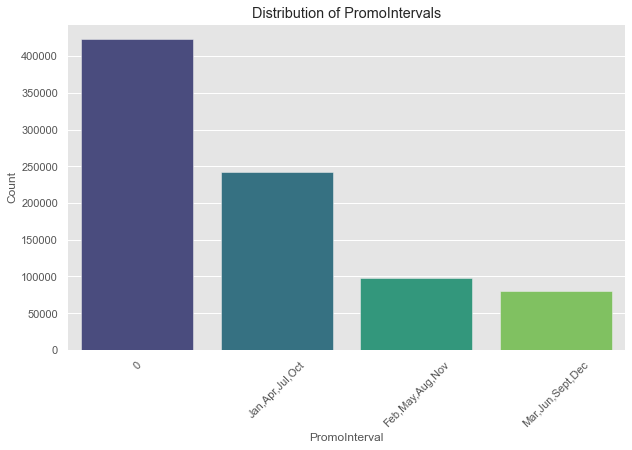

In [437]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_store_df, x='PromoInterval', palette='viridis')
plt.title('Distribution of PromoIntervals')
plt.xlabel('PromoInterval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


* The most common promo interval is "Jan,Apr,Jul,Oct," indicating that this promotion occurs frequently.
* Other promo intervals such as "Feb,May,Aug,Nov" and "Mar,Jun,Sept,Dec" are also present but less frequent.
* This analysis helps in understanding the distribution of promotional intervals used in the dataset, which can inform decisions related to promotional scheduling and planning.

# Summary

Summary of the key insights from this data:

- **Sales Trends:**
  - Steady monthly sales growth over the years, peaking in 2015.
  - Seasonal and weekly sales variations.
  - Promotions consistently boost sales.
  - Sunday & Monday has most sale comared to other days

- **Store Impact:**
  - 'A' stores top total sales 'B' has most average sales.
  - 'C' and 'D' stores also perform well.
  - Sale for every store peaks during promotion period

- **Customer Behavior:**
  - 'A' stores attract the most customers.
  - 'D' stores have higher customer spending.

- **Holiday Sales:**
  - Public holidays lead to higher traffic.
  - Christmas lead to higher sales over stores
  - Promotions during holidays boost sales.

- **Store Groups:**
  - Stores grouped by sales statistics.

- **Promotion Impact:**
  - Promotions consistently increase sales,majorly peaks during holiday.
  - Promo2 impact varies yearly.

- **Assortment Levels:**
  - Store types linked to specific assortment levels.

- **Competition Influence:**
  - Competition distance impacts sales and customer counts.

- **PromoInterval Patterns:**
  - "Jan,Apr,Jul,Oct" is the most common promo interval.

- **Correlation Insights:**
  - Strong correlations exist between sales, customers, and promos.

This concise summary highlights the key findings without repeating headlines.